In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import stats
import numpy as np
import pandas as pd
import wave
import math
import os
import librosa
import librosa.display
from pydub import AudioSegment
import seaborn as sns
from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

Importujeme potrebné knižnice a nastavíme štýl zobrazovania grafov

In [24]:
sample_rate = 44100
sound = AudioSegment.from_file("../Mykola/bakalarka/sounds02/piano.wav")
sound.duration_seconds == (len(sound) / 1000.0)
length_in_seconds = math.ceil(round((sound.duration_seconds % 60),3))

Nastavíme hodnotu vzorkovacej frekvencie zvuku.
Načítame zvukový súbor piano.wav a určíme jeho trvanie v sekundách.

In [25]:
amplitude = 11
noise = stats.truncnorm(-1, 1, scale=min(2**16, 2**amplitude)).rvs(sample_rate * length_in_seconds)
wavfile.write('../Mykola/bakalarka/sounds02/noise.wav', sample_rate, noise.astype(np.int16))

Kód generuje šum pomocou funkcie truncnorm zo štatistického balíka a ukladá ho do súboru noise.wav.

In [26]:
fnames =['../Mykola/bakalarka/sounds02/piano.wav', '../Mykola/bakalarka/sounds02/noise.wav']
wavs = [wave.open(fn) for fn in fnames]
frames = [w.readframes(w.getnframes()) for w in wavs]
samples = [np.frombuffer(f, dtype='<i2') for f in frames]
samples = [samp.astype(np.float64) for samp in samples]
n = min(map(len, samples))
mix = samples[0][:n] + samples[1][:n]

Kód načíta dva zvukové súbory, spracuje ich ako bajty, skonvertuje ich do príslušného formátu pomocou knižnice NumPy a zmieša zvukové signály.

In [ ]:
mix_wav = wave.open('../Mykola/bakalarka/sounds02/mix.wav', 'w')
mix_wav.setparams(wavs[0].getparams())
mix_wav.writeframes(mix.astype('<i2').tobytes())
mix_wav.close()

Uloženie zmiešaného zvuku do súboru mix.wav.

In [27]:
fn_wav = os.path.join('..', 'Mykola', 'bakalarka','sounds02', 'noise.wav')
n, sr = librosa.load(fn_wav, sr=None)

Tento kód načíta a spracuje zvukové súbory a vytvorí nový zvukový súbor, ktorý obsahuje kombináciu dvoch súborov s rôznymi typmi zvukov.

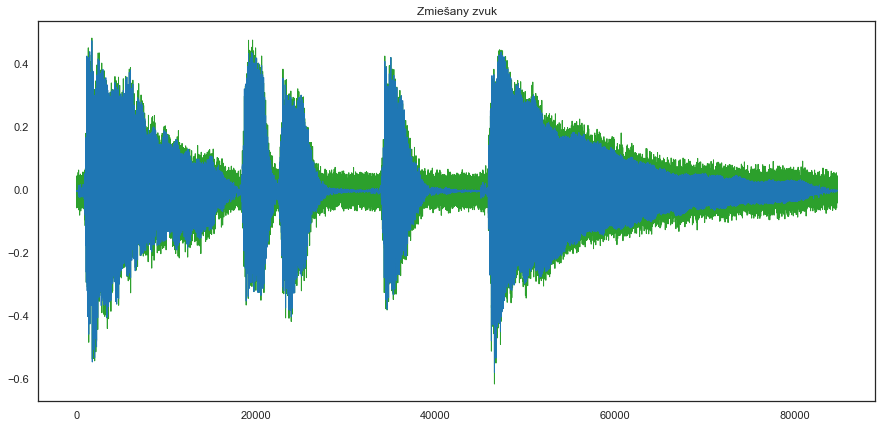

In [28]:
m, sr = librosa.load('../Mykola/bakalarka/sounds02/piano.wav') # cesta na .wav file 
y1, sample_rate1 = librosa.load('../Mykola/bakalarka/sounds02/mix.wav', mono=True)
pd.Series(y1).plot(figsize=(10,5),
                  lw=1,
                  title='',
                  color=color_pal[2])
pd.Series(m).plot(figsize=(15,7),
                  lw=1,
                  title='Zmiešany zvuk',
                  color=color_pal[0])

plt.show()

Tento kód načíta dva zvukové súbory - 'piano.wav' a 'mix.wav' pomocou knižnice librosa. Potom vykreslí priebeh zmiešaného zvukového súboru 'mix.wav' spolu s priebehom súboru 'piano.wav' pomocou knižníc pandas a matplotlib.